# 1. Import Required Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
import re
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

# 2. Import Dataset

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Categories are all bundled together and is delimited by an "|", primary and final categories are separated for proper analysis using Microsoft Excel Power Query

In [4]:
df = pd.read_csv("amazon_catagory_delimited.csv")

In [5]:
df.head()

,product_id,product_name,category_overall,category_primary,category_secondary,category_tertiary,category_quaternary,category_quinary,discounted_price,actual_price,...,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,₹399,"₹1,099",...,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,₹199,₹349,...,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,USBCables,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,₹199,"₹1,899",...,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,₹329,₹699,...,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,₹154,₹399,...,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


With categories separated, the dataset becomes more usable and easier for use in the EDA

## 2.1. Dataset Profiling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category_overall     1465 non-null   object 
 3   category_primary     1465 non-null   object 
 4   category_secondary   1465 non-null   object 
 5   category_tertiary    1457 non-null   object 
 6   category_quaternary  1300 non-null   object 
 7   category_quinary     522 non-null    object 
 8   discounted_price     1465 non-null   object 
 9   actual_price         1465 non-null   object 
 10  discount_percentage  1465 non-null   float64
 11  rating               1464 non-null   float64
 12  rating_count         1463 non-null   float64
 13  about_product        1465 non-null   object 
 14  user_id              1465 non-null   object 
 15  user_name            1465 non-null   o

Dtype of most columns appear to be objects with discount_percentage, rating, rating_count being correctly loaded as floats. discounted_price and actual_price should have their Dtype to be floats as well, but needs to be cleaned first.

In [7]:
df.isnull().sum()

product_id               0
product_name             0
category_overall         0
category_primary         0
category_secondary       0
category_tertiary        8
category_quaternary    165
category_quinary       943
discounted_price         0
actual_price             0
discount_percentage      0
rating                   1
rating_count             2
about_product            0
user_id                  0
user_name                0
review_id                0
review_title             0
review_content           0
img_link                 0
product_link             0
dtype: int64

## 2.2. Data Cleaning: Null Values

Several columns appear to contain null values and must be dealt with.

Tertiary through quinary categories contain nulls and may not have useful information on its own and thus columns will be dropped.

There is a null value in the rating column and will be investigated.

There are two nulls in the rating_count column, so they must be investigated as well to determine how to deal with them.

In [8]:
df.drop(['category_tertiary', 'category_quaternary', 'category_quinary'], axis = 1, inplace = True)

With the extra categories dropped, next is to investigate the null value in the rating attribute.

In [9]:
df[df['rating'].isnull()]

,product_id,product_name,category_overall,category_primary,category_secondary,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,Vacuums,Home&Kitchen,Kitchen&HomeAppliances,"₹2,099","₹2,499",0.16,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


The actual rating can be found on its website, but since the link cannot be accessed directly from the dataframe, it has to be converted into a full string to be accessed

In [10]:
df[df['rating'].isnull()][['product_link']].to_string()

'                                                                                                                  product_link\n1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295'

**actual rating was found to be 3.9 from the above link and thus will be used to fill the null value**

In [11]:
df['rating'] = df['rating'].replace(np.NaN, 3.9)

Now the investigation of the null values in the rating_count attribute

In [12]:
df[df['rating_count'].isnull()]

,product_id,product_name,category_overall,category_primary,category_secondary,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,USBCables,Computers&Accessories,Accessories&Peripherals,₹199,₹999,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",USBCables,Computers&Accessories,Accessories&Peripherals,₹249,₹999,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [13]:
df[['category_primary', 'product_id']].groupby('category_primary').count().sort_values(by = ['product_id'], ascending = False)

,product_id
category_primary,
Electronics,526
Computers&Accessories,453
Home&Kitchen,448
OfficeProducts,31
HomeImprovement,2
MusicalInstruments,2
Car&Motorbike,1
Health&PersonalCare,1
Toys&Games,1


As both records are in the Computers&Accessories category_primary which contains over 400 other products, both records can be removed as it will have a small impact in the analysis

Now that null values are dealt with, one more check should be done to ensure that dataset is usable for analysis

In [14]:
df.dropna(inplace = True)
df.isnull().sum()

product_id             0
product_name           0
category_overall       0
category_primary       0
category_secondary     0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

## 2.3. Data Cleaning: Dtype conversion

Now Dtypes for discounted_price and actual_price needs to be converted to float

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category_overall     1463 non-null   object 
 3   category_primary     1463 non-null   object 
 4   category_secondary   1463 non-null   object 
 5   discounted_price     1463 non-null   object 
 6   actual_price         1463 non-null   object 
 7   discount_percentage  1463 non-null   float64
 8   rating               1463 non-null   float64
 9   rating_count         1463 non-null   float64
 10  about_product        1463 non-null   object 
 11  user_id              1463 non-null   object 
 12  user_name            1463 non-null   object 
 13  review_id            1463 non-null   object 
 14  review_title         1463 non-null   object 
 15  review_content       1463 non-null   object

To clean the price attributes, non-numerical characters must be removed first

In [16]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

As rating_count is the number of reviews done, it will be a positive whole number integer and thus, int Dtype will be more appropriate for this attribute.

In [17]:
df['rating_count'] = df['rating_count'].astype('int')

Now that all suitable Dtypes are converted, it should be checked once more

In [18]:
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head()

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,0.64,4.2,24269
1,199.0,349.0,0.43,4.0,43994
2,199.0,1899.0,0.90,3.9,7928
3,329.0,699.0,0.53,4.2,94363
4,154.0,399.0,0.61,4.2,16905


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category_overall     1463 non-null   object 
 3   category_primary     1463 non-null   object 
 4   category_secondary   1463 non-null   object 
 5   discounted_price     1463 non-null   float64
 6   actual_price         1463 non-null   float64
 7   discount_percentage  1463 non-null   float64
 8   rating               1463 non-null   float64
 9   rating_count         1463 non-null   int32  
 10  about_product        1463 non-null   object 
 11  user_id              1463 non-null   object 
 12  user_name            1463 non-null   object 
 13  review_id            1463 non-null   object 
 14  review_title         1463 non-null   object 
 15  review_content       1463 non-null   object

# 3. Exploratory Data Analysis

In [20]:
df.describe(include = 'all')

,product_id,product_name,category_overall,category_primary,category_secondary,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1463,1463,1463,1463,1463,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463,1463,1463,1463,1463,1463,1463,1463
unique,1349,1335,195,9,29,NaN,NaN,NaN,NaN,NaN,1291,1192,1192,1192,1192,1210,1410,1463
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",USBCables,Electronics,Accessories&Peripherals,NaN,NaN,NaN,NaN,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,526,379,NaN,NaN,NaN,NaN,NaN,6,10,10,10,10,8,3,1
mean,NaN,NaN,NaN,NaN,NaN,3129.277122,5451.068544,0.476507,4.096582,18295.541353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6948.222850,10881.018448,0.216224,0.289444,42753.864952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,39.000000,39.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,325.000000,800.000000,0.320000,4.000000,1186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,799.000000,1690.000000,0.500000,4.100000,5179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1999.000000,4312.500000,0.630000,4.300000,17336.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.duplicated().any()

False

## 3.1. Comparison of Numerical Attributes

### 3.1.1. Pairplot

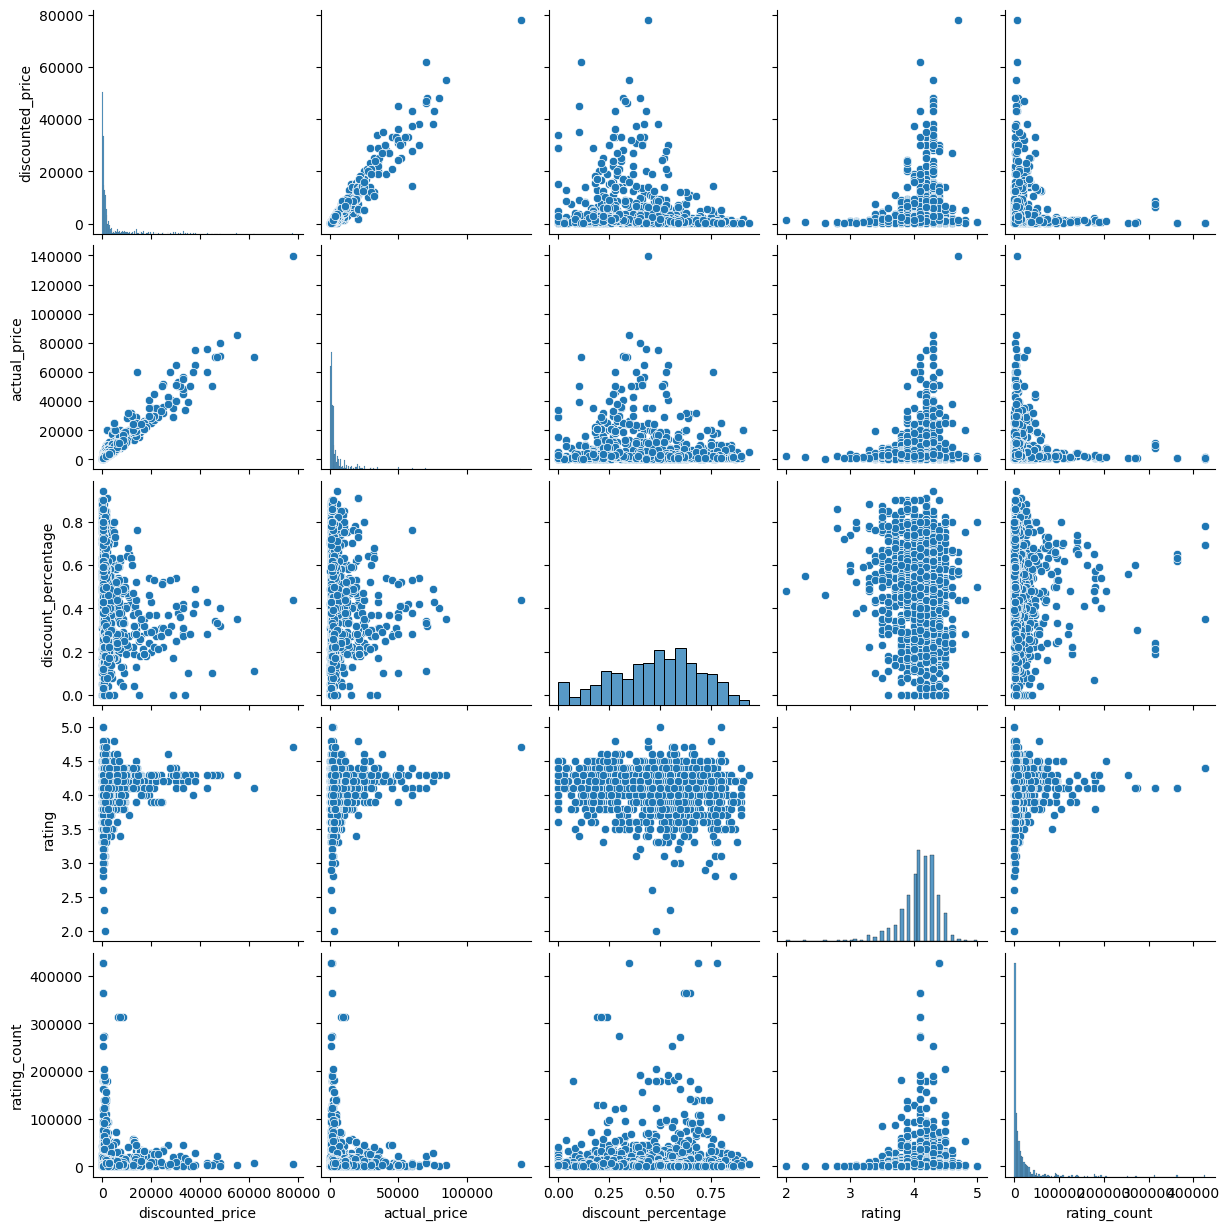

In [22]:
sns.pairplot(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']])
plt.show()

### 3.1.2. Correlation Matrix (Pearson)

As many of the attributes are of the object type, they have to be encoded for use in a correlation matrix.

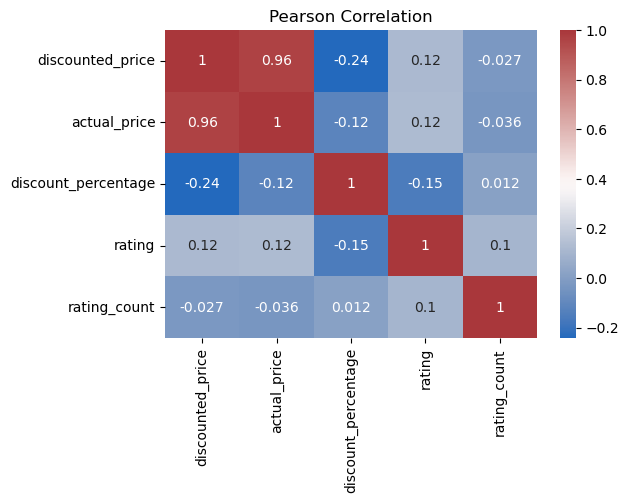

In [23]:
correlation_matrix = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
plt.figure(figsize = (6, 4))
plt.title("Pearson Correlation")
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag')
plt.show()

**While there are several correlated attributes, most in this case are not meaningful.**

## 3.2. Comparison of Categories

In [24]:
df[['category_overall', 'product_id']].groupby('category_overall').count().sort_values(by = ['product_id'], ascending = False)

,product_id
category_overall,
USBCables,231
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
InternalHardDrives,1
InkjetInkRefills&Kits,1
HandlebarMounts,1


**The product with the greatest sale by a large margin are USBCables**

In [25]:
df[['category_primary', 'product_id']].groupby('category_primary').count().sort_values(by = ['product_id'], ascending = False)

,product_id
category_primary,
Electronics,526
Computers&Accessories,451
Home&Kitchen,448
OfficeProducts,31
HomeImprovement,2
MusicalInstruments,2
Car&Motorbike,1
Health&PersonalCare,1
Toys&Games,1


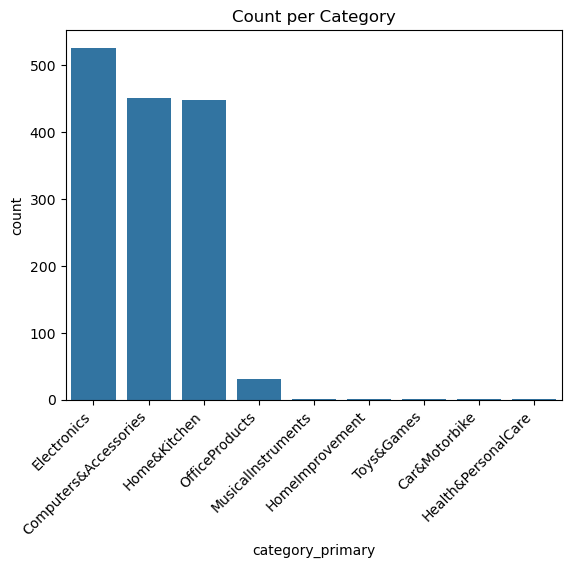

In [26]:
order_by_count = df['category_primary'].value_counts().index
sns.countplot(x = 'category_primary', data = df, order = order_by_count)
plt.title('Count per Category')
plt.xticks(rotation=45, ha='right')
plt.show()

**Electronics however appears to be the most common primary category despite USBCables being the most sold item. Looking at the previous table, while quantity is much lower, the 2nd best selling items onwards appear to be electronics and thus improved on the number of sales of this category as a whole**

# 3.3. Sentiment Analysis

**General sentiment of each product are transformed based on review_title using huggingface's pipeline with the distilbert/distilbert-base-uncased-finetuned-sst-2-english model**

In [27]:
classifier = pipeline(task = 'sentiment-analysis', model = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english')

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


In [28]:
df = (
    df
    .assign(sentiment = lambda x: x['review_title'].apply(lambda s: classifier(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

In [29]:
df.head()

,product_id,product_name,category_overall,category_primary,category_secondary,discounted_price,actual_price,discount_percentage,rating,rating_count,...,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sentiment,label,score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,0.64,4.2,24269,...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[{'label': 'POSITIVE', 'score': 0.999669551849...",POSITIVE,0.999670
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,Computers&Accessories,Accessories&Peripherals,199.0,349.0,0.43,4.0,43994,...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[{'label': 'POSITIVE', 'score': 0.987496733665...",POSITIVE,0.987497
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,USBCables,Computers&Accessories,Accessories&Peripherals,199.0,1899.0,0.90,3.9,7928,...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"[{'label': 'POSITIVE', 'score': 0.999791324138...",POSITIVE,0.999791
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,Computers&Accessories,Accessories&Peripherals,329.0,699.0,0.53,4.2,94363,...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"[{'label': 'POSITIVE', 'score': 0.998346328735...",POSITIVE,0.998346
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,Computers&Accessories,Accessories&Peripherals,154.0,399.0,0.61,4.2,16905,...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"[{'label': 'POSITIVE', 'score': 0.999861955642...",POSITIVE,0.999862


General sentiments of either positive or negative were successfully obtained from review_title

In [30]:
df[['label', 'product_id']].groupby('label').count().sort_values(by = ['product_id'], ascending = False)

,product_id
label,
POSITIVE,1148
NEGATIVE,315


In [50]:
df[['label', 'rating']].groupby('label').mean().sort_values(by = ['rating'], ascending = False)

,rating
label,
POSITIVE,4.137979
NEGATIVE,3.945714


In [49]:
print('Standard deviation of POSITIVE Rating:', round(stats.tstd(df[df['label'] == 'POSITIVE']['rating']),2))
print('Standard deviation of NEGATIVE Rating:', round(stats.tstd(df[df['label'] == 'NEGATIVE']['rating']),2))

Standard deviation of POSITIVE Rating: 0.26
Standard deviation of NEGATIVE Rating: 0.34


While mean rating upfront appears to be similar, there is a large sample size and thus one-way ANOVA must be done to determine if difference is significant or not

In [32]:
f_statistic, p_value = stats.f_oneway(df['rating'][df['label'] == 'POSITIVE'],
                                     df['rating'][df['label'] == 'NEGATIVE'])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 117.77480655890528
P-value: 1.9215545659260768e-26


**Since P-value is much lesser than 0.05, sentiment did significantly affect rating**

Specifics into what affected ratings will be further investigated

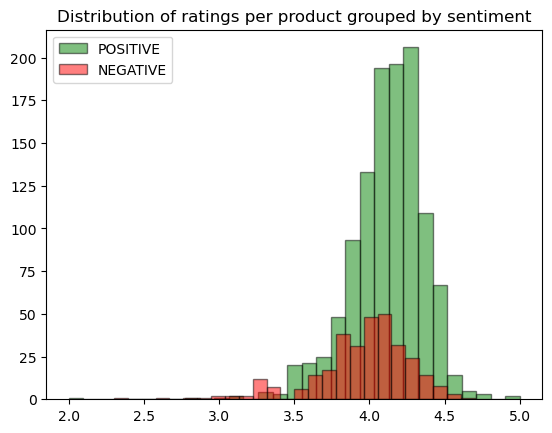

In [53]:
fig, ax = plt.subplots()
rects1 = ax.hist(df[df['label'] == 'POSITIVE']['rating'], color='green', ec='black', alpha = 0.5, bins=31, label='POSITIVE')
rects2 = ax.hist(df[df['label'] == 'NEGATIVE']['rating'], color='red', ec='black', alpha = 0.5, bins=26, label='NEGATIVE')
plt.title('Distribution of ratings per product grouped by sentiment')
plt.legend()
plt.show()

Ratings given appear to be relatively normally distributed, but for the POSITIVE group there appears to be a slight left lean with low standard deviation, and the NEGATIVE group appears to have a slightly bimodal distribution with modes around 3.3 and 4.1 and a slightly left leaning mean with a higher standard deviation based on its mean. **The leaning of each distribution are expected as the more positively a consumer feels about a product the more likely a higher the rating given and vice versa**

## 3.1. Sentiment Categorisation

Now lets investigate into specific higher volume primary categories

In [34]:
sorted(list(df['category_primary'].unique()))

['Car&Motorbike',
 'Computers&Accessories',
 'Electronics',
 'Health&PersonalCare',
 'Home&Kitchen',
 'HomeImprovement',
 'MusicalInstruments',
 'OfficeProducts',
 'Toys&Games']

In [35]:
df[['category_primary', 'label']].groupby(by=['category_primary', 'label']).size().to_frame()

0
category_primary      label        
Car&Motorbike         POSITIVE    1
Computers&Accessories NEGATIVE   84
                      POSITIVE  367
Electronics           NEGATIVE  130
                      POSITIVE  396
Health&PersonalCare   NEGATIVE    1
Home&Kitchen          NEGATIVE   97
                      POSITIVE  351
HomeImprovement       POSITIVE    2
MusicalInstruments    POSITIVE    2
OfficeProducts        NEGATIVE    3
                      POSITIVE   28
Toys&Games            POSITIVE    1

In [36]:
pos = [1, 367, 396, 0, 351, 2, 2, 28, 1]
neg = [0, 84, 130, 1, 97, 0, 0, 3, 0]

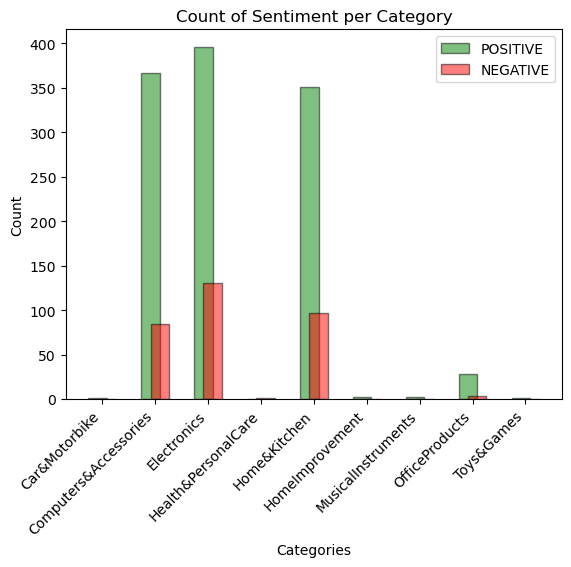

In [67]:
categories = sorted(df['category_primary'].unique())
data1 = pos
data2 = neg

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/4, data1, width, label='POSITIVE', color = 'green', ec='black', alpha = 0.5)
plt.bar(x + width/4, data2, width, label='NEGATIVE', color = 'red', ec='black', alpha = 0.5)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Sentiment per Category')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.show()

**Computers&Accessories, Electronics, and Home&Kitchen will be investigated as there are large volumes for all three categories.**

## 3.2. Effect of category_primary on Rating

In [74]:
print('Computers&Accessories')
df[df['category_primary'] == 'Computers&Accessories'][['label', 'rating']].groupby('label').mean().sort_values(by = ['rating'], ascending = False)

Computers&Accessories


,rating
label,
POSITIVE,4.189373
NEGATIVE,4.008333


In [73]:
print('Electronics')
df[df['category_primary'] == 'Electronics'][['label', 'rating']].groupby('label').mean().sort_values(by = ['rating'], ascending = False)

Electronics


,rating
label,
POSITIVE,4.119949
NEGATIVE,3.965385


In [72]:
print('Home&Kitchen')
df[df['category_primary'] == 'Home&Kitchen'][['label', 'rating']].groupby('label').mean().sort_values(by = ['rating'], ascending = False)

Home&Kitchen


,rating
label,
POSITIVE,4.091168
NEGATIVE,3.856701


It appears that the categories with lower sales voloume appear to be rated more poorly even within the POSITIVE and NEGATIVE groupings, either indicating that the quality of the products in each categories have certain biases to them that results in consumers giving different ratings, or that the products sold in the Home&Kitchen and Electronics are less positively viewed than expected as compared to the products in Computer&Accessories

**As a result, the causes for the sentiments of each categories must be investigated individually as the varying categories may have different rationale for their sentiments**

## 3.3. Feature Extraction: Word Frequency

Key feature words for certain sentiments can be found in the review_content, but as is raw it is too messy and may not give an accurate count of the word frequencies, so first the review_content string must be cleaned.

In [38]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[\.\,\*\?\!]', ' ', text)
    return text

strings are cleaned by ensuring all words are in lower casing, removing website related domain keywords, and removing punctuations and other characters.

In [39]:
df['review_content'] = df['review_content'].apply(lambda x: clean _text(x))

In [77]:
df[['review_content']].head()

,review_content
0,looks durable charging is fine toono complains...
1,i ordered this cable to connect my phone to an...
2,not quite durable and sturdy good nice produ...
3,good product long wire charges good nice i bou...
4,bought this instead of original apple does th...


review_content appears as cleaned as possible barring some spelling errors and ready for feature extraction.

### 3.3.1. Feature Extraction and Analysis: Computers&Accessories

In [79]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'POSITIVE') & (df['category_primary'] == 'Computers&Accessories')]['review_content'])

df_key_words_pos = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_pos.sort_values(by='count', ascending=False)

,word,count
3,good,1496
6,product,966
0,cable,906
7,quality,526
1,charging,523
8,use,344
5,price,322
2,fast,310
9,using,305
4,mouse,275


In [81]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'NEGATIVE') & (df['category_primary'] == 'Computers&Accessories')]['review_content'])

df_key_words_neg = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_neg.sort_values(by='count', ascending=False)

,word,count
2,good,267
5,product,203
0,cable,164
1,charging,161
9,use,113
6,quality,89
4,like,71
3,laptop,64
8,time,63
7,screen,55


**As majority of the products sold in this category is cables under the category_tertiary of USBCables (count = 231), the word cable appears very frequently for both the POSITIVE and NEGATIVE groups.**

**The word fast also appears very frequently only in the POSITIVE group, suggesting that fast charging cables are more positively viewed.**

**The word mouse appears frequently only in the POSITIVE group as well, likely indicating that the quality of mouse sold in this analysis is more positively viewed and similar mouse products of this quality can be further considered.**

**Charging quality and price of the products in this category_primary appears to be of significant influence to consumers'sentiment as they appear in both POSITIVE and NEGATIVE groups.**

**The words laptop and screen appear quite frequently in the NEGATIVE group only, indicating that the laptop products sold may have a more negative impact on consumer sentiment, and since the word screen appears frequently as well, likely it has to do with the laptop screen. Further investigation can be done using regex and match to locate these reviews and see if both words appear together frequently or not.**

**Time appears frequently in the NEGATIVE group as well, but without more context it is not possible to determine what does it refer to, as it could be delivery time, charging time, use time, etc.**

### 3.3.2. Feature Extraction and Analysis: Electronics

In [82]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'POSITIVE') & (df['category_primary'] == 'Electronics')]['review_content'])

df_key_words_pos = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_pos.sort_values(by='count', ascending=False)

,word,count
1,good,2140
6,quality,1061
5,product,942
8,tv,592
4,price,541
7,sound,511
3,phone,505
0,battery,472
2,like,433
9,watch,432


In [83]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'NEGATIVE') & (df['category_primary'] == 'Electronics')]['review_content'])

df_key_words_neg = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_neg.sort_values(by='count', ascending=False)

,word,count
2,good,801
4,phone,401
7,quality,295
9,watch,284
6,product,230
0,battery,210
1,camera,194
5,price,189
8,use,153
3,like,149


**TV products appears to be more positively viewed as they only appear frequently in the POSITIVE grouping and not frequently in the NEGATIVE group, even when they are within the top 5 highest count of products**

**Sound quality of the electronics like the In-ears or TVs are of importance in the eyes of consumers, and the range of products currently do produce sounds that are positively viewed by consumers as the word sound only appears frequently in the POSITIVE group.**

**Phone products appear to have mixed reviews, with the word phone appearing at a larger proportion of NEGATIVE extracted words as compared to that of the POSITIVE extracted words, indicating that while the quality of phones are also very important, the current selection available in this analysis tend to elicit sentiments more towards the NEGATIVE.**

**Battery also appears often in both the POSITIVE and NEGATIVE groups, indicating that the lifespan of either battery products or the batteries of electronic products must be longer**

**Last but not least, watches also appears frequently in both POSITIVE and NEGATIVE groups, and since SmartWatches are the 2nd most sold product, the quality of these watches must be improved.**

### 3.3.3. Feature Extraction and Analysis: Home&Kitchen

In [86]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'POSITIVE') & (df['category_primary'] == 'Home&Kitchen')]['review_content'])

df_key_words_pos = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_pos.sort_values(by='count', ascending=False)

,word,count
1,good,1282
5,product,1203
7,use,605
0,easy,481
9,water,338
6,quality,308
3,nice,255
2,like,225
4,price,222
8,using,188


In [87]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df[(df['label'] == 'NEGATIVE') & (df['category_primary'] == 'Home&Kitchen')]['review_content'])

df_key_words_neg = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})

df_key_words_neg.sort_values(by='count', ascending=False)

,word,count
4,product,315
1,good,271
8,water,129
7,use,120
0,easy,89
5,quality,71
2,like,65
6,time,57
9,working,48
3,nice,47


**The words easy and use appear frequently in both the POSITIVE and NEGATIVE sentiments, suggesting that the ease of use of a product might be an important factor in the rating of a product**

**The word water appears frequently in both the POSITIVE and NEGATIVE sentiments, suggesting that products commonly sold in this category are water related such as water purifiers and thus, the quality of such products must be monitored as they likely impact the rating of this category significantly**

**Price generally appears to be generally decent as they frequently appear in the POSITIVE group**

**The word working appears a surprisingly frequently in the NEGATIVE sentiment group, suggesting that there are some products that may be defective and thus may be one of the reasons that the ratings for this category is lower than the other two. This is also supported by the words quality appearing frequently in the NEGATIVE (and POSITIVE) group as well.**